In [290]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        '''print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [291]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

EXLORATARY DATA ANALYSIS

In [292]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [293]:
df.shape

(891, 12)

In [294]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [295]:
#checking for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since PassengerId, Name, Ticket Number are not important for prediction, we can drop these columns

In [296]:
df=df.drop(columns=['PassengerId','Name','Ticket'])

We doesn't know whether smaller age groups got more importance in survival. So, we can't remove the column, so we can impute the column

In [297]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [298]:
#since Cabin had more 80% column as null values, we can remove them. If we impute the column it may bias the model.
df=df.drop(columns='Cabin')

In [299]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [300]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [301]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [302]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [303]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

There are no null values

Visual Analysis

Text(0, 0.5, 'No of Passengers')

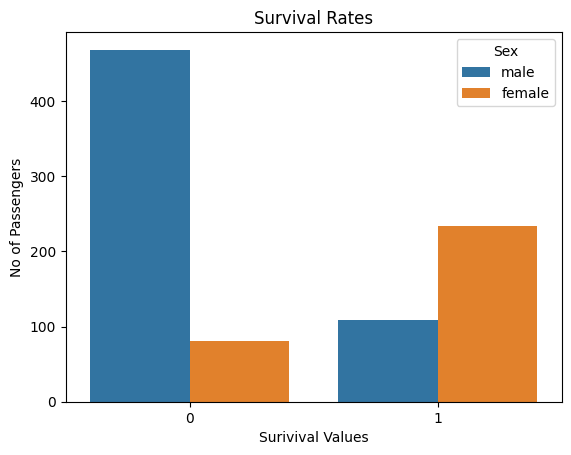

In [199]:
sns.countplot(x='Survived',hue="Sex",data=df)
plt.title("Survival Rates")
plt.xlabel('Surivival Values')
plt.ylabel("No of Passengers")

<Axes: xlabel='Pclass', ylabel='Survived'>

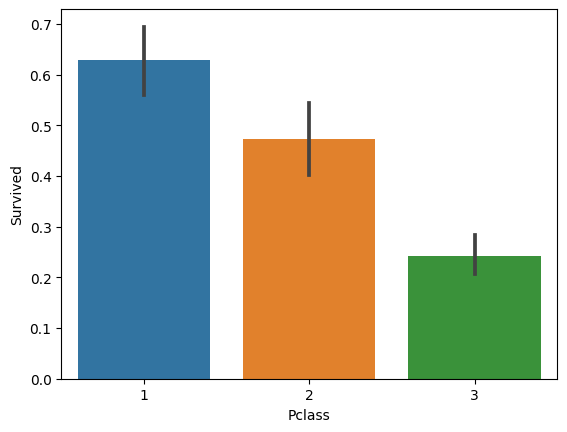

In [200]:
sns.barplot(x='Pclass',y='Survived',data=df)


Text(0.5, 1.0, 'Survival Rates Based on Pclass')

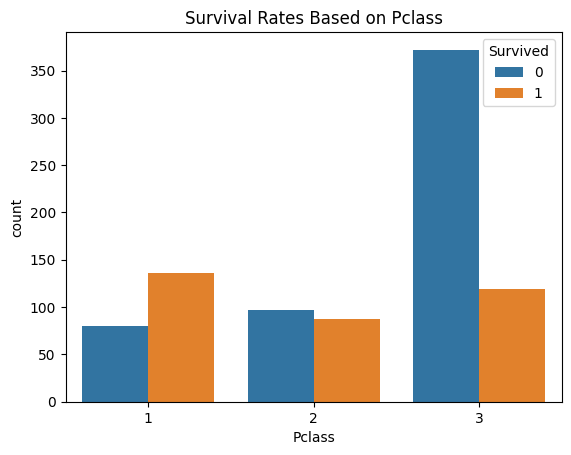

In [201]:
sns.countplot(x='Pclass',hue="Survived",data=df)
plt.title("Survival Rates Based on Pclass")


It indicates that 3 class people survival rate is very poor.

<Axes: xlabel='Sex', ylabel='Survived'>

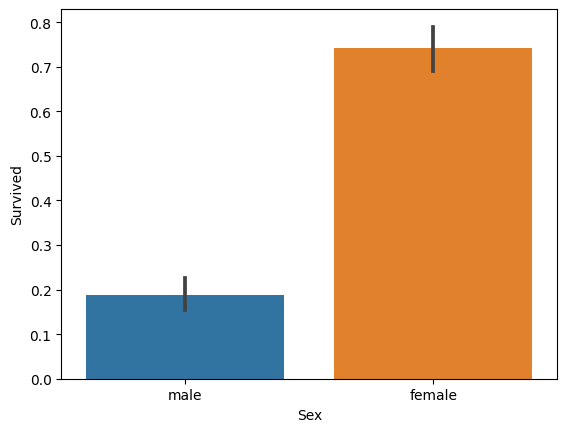

In [202]:
sns.barplot(x='Sex',y='Survived',data=df)


Text(0.5, 1.0, 'Survival Rates Based on Sex')

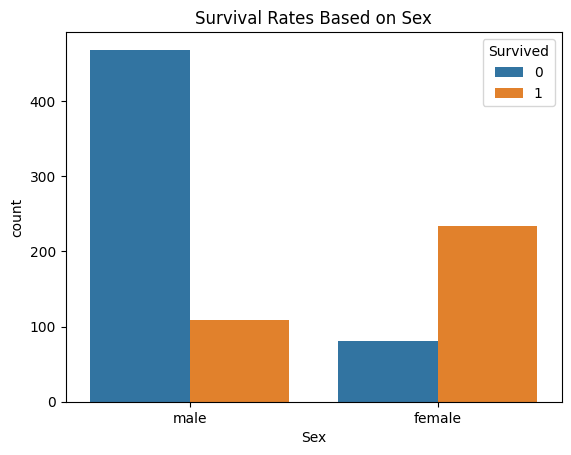

In [203]:
sns.countplot(x='Sex',hue="Survived",data=df)
plt.title("Survival Rates Based on Sex")


Female survival rate is more.

<Axes: xlabel='Age', ylabel='Survived'>

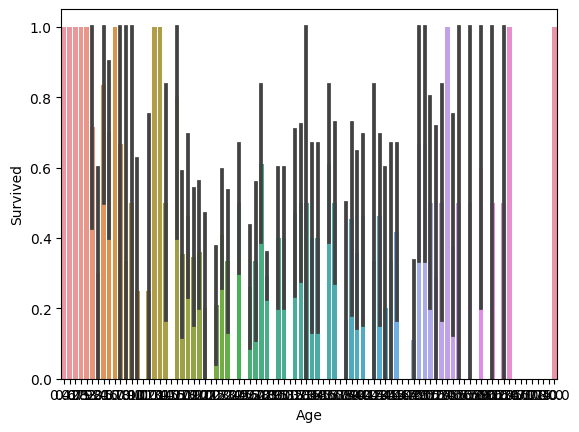

In [204]:
sns.barplot(x='Age',y='Survived',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Survival Rates according to Age')

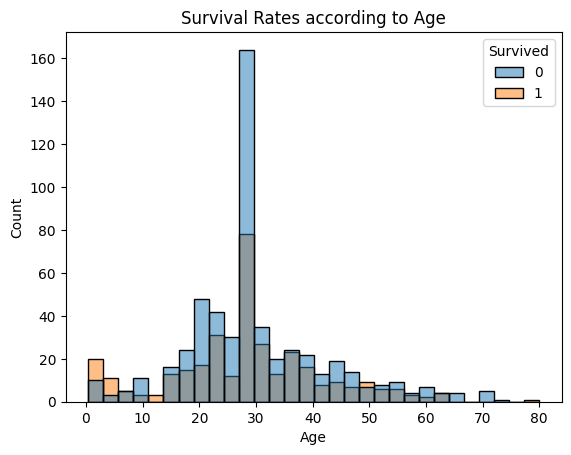

In [205]:
sns.histplot(x='Age',hue='Survived',data=df)
plt.title('Survival Rates according to Age')

People in the middle Age didn't survive more

Children Survived more

Text(0.5, 1.0, 'Survival Rate according to No of Siblings')

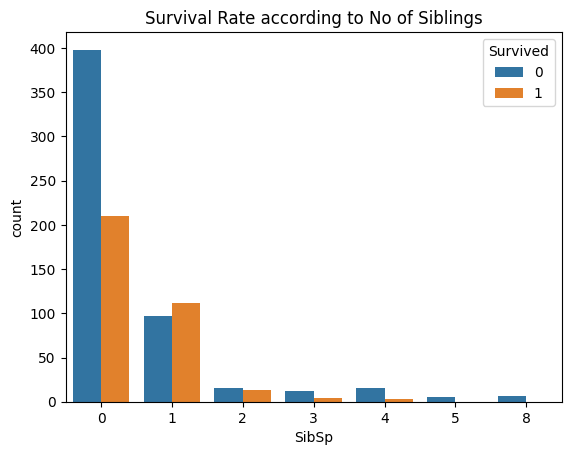

In [206]:
sns.countplot(x='SibSp',hue='Survived',data=df)
plt.title('Survival Rate according to No of Siblings')

Text(0.5, 1.0, 'Survival Rate according to Parents')

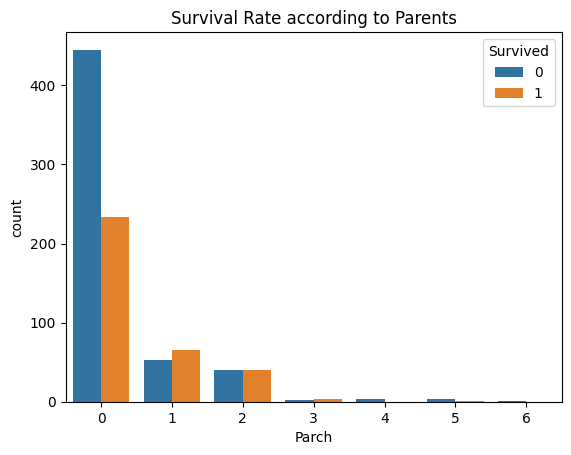

In [207]:
sns.countplot(x='Parch',hue='Survived',data=df)
plt.title('Survival Rate according to Parents')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Survival Rates Based on Sex')

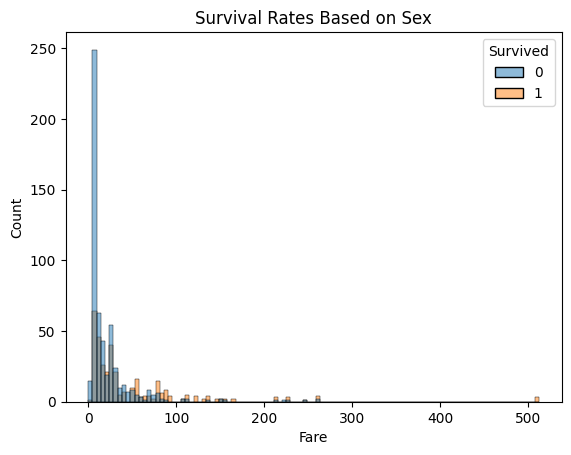

In [209]:
sns.histplot(x='Fare',hue="Survived",data=df)
plt.title("Survival Rates Based on Sex")


When the Ticlet and Fare Price is more, People Survived Count is More.

<Axes: xlabel='Embarked', ylabel='count'>

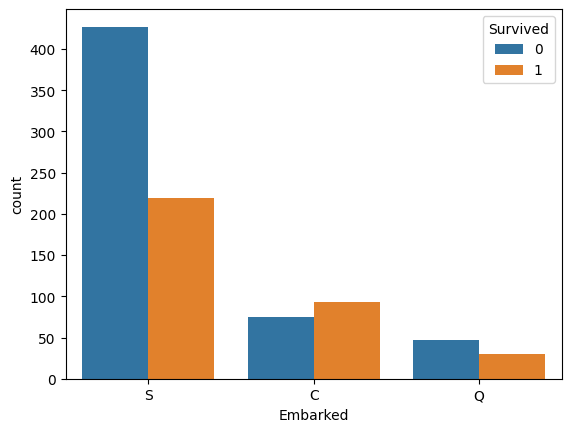

In [125]:
sns.countplot(x='Embarked',hue='Survived',data=df)

People in S had died more.
People in Q had Survived more.

Converting String to Numbers

In [304]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['Embarked']=label.fit_transform(df['Embarked'])

Heatmap

<Axes: >

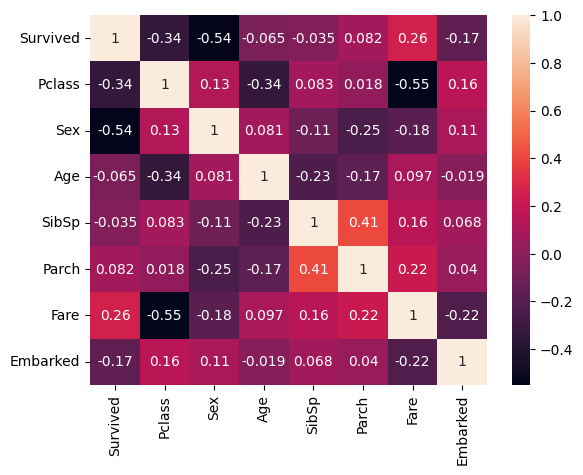

In [305]:
sns.heatmap(df.corr(),annot=True)

Columns Sex and PClass have more impact on Survival Rates

In [306]:
x=df.drop(columns='Survived')
y=df['Survived']

In [307]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [308]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,0,28.0,0,2,15.2458,0
439,2,1,31.0,0,0,10.5000,2
817,2,1,31.0,1,1,37.0042,0
378,3,1,20.0,0,0,4.0125,0
491,3,1,21.0,0,0,7.2500,2
...,...,...,...,...,...,...,...
835,1,0,39.0,1,1,83.1583,0
192,3,0,19.0,1,0,7.8542,2
629,3,1,28.0,0,0,7.7333,1
559,3,0,36.0,1,0,17.4000,2


In [310]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [311]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [312]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)


LogisticRegression()

In [313]:
y_pred=log_model.predict(X_test)

In [314]:
accuracy=accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred)

In [316]:
print('Accuracy Score: ',accuracy)
print('Classification Report: ')
print(classification)

Accuracy Score:  0.7988826815642458
Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [317]:
dtree_model=DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [318]:
y_pred=dtree_model.predict(X_test)
dtree_accuracy=accuracy_score(y_test,y_pred)
dtree_classification=classification_report(y_test,y_pred)

In [319]:
print('Accuracy Score: ',dtree_accuracy)
print('Classification Report: ')
print(dtree_classification)

Accuracy Score:  0.7821229050279329
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       110
           1       0.72      0.71      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [325]:
knn_model=KNeighborsClassifier(n_neighbors=18)
knn_model.fit(X_train,y_train)


knn_y_pred=knn_model.predict(X_test)
knn_accuracy=accuracy_score(y_test,knn_y_pred)
knn_classification=classification_report(y_test,knn_y_pred)

In [326]:
print('Accuracy Score: ',knn_accuracy)
print('Classification Report: ')
print(knn_classification)

Accuracy Score:  0.8324022346368715
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [327]:
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier()
random_model.fit(X_train,y_train)


random_y_pred=knn_model.predict(X_test)
random_accuracy=accuracy_score(y_test,random_y_pred)
random_classification=classification_report(y_test,random_y_pred)

In [328]:
print('Accuracy Score: ',random_accuracy)
print('Classification Report: ')
print(random_classification)

Accuracy Score:  0.8324022346368715
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.85      0.68      0.76        69

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179

